# IPA transcriptions grammar

This notebook demonstrates a basic [Lark](https://lark-parser.readthedocs.io/en/latest/) grammar for validating transcriptions using symbols from the [International Phonetic Alphabet (IPA)](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet).

If you want to graphically visualize parse trees from IPA transcriptions, you'll need to install `graphiz`: https://graphviz.org/

In [1]:
from lark import Lark

def load_grammar(filename='ipa.lark'):
    """Return a lark parser from the given .lark grammar"""
    with open(filename, mode='r') as f:
        return Lark(f.read(), start='transcription')

def pretty_parse(sentence, parser):
    """Parse a given 'sentence' with the given parser and pretty-print the parse tree"""
    try:
        print(parser.parse(sentence).pretty())
    except Exception as e:
        print(e)


In [2]:
parser = load_grammar()

In [3]:
pretty_parse('/ˈɡɹæ.məɹ/', parser)

transcription
  phonemic
    syllables
      None
      stress
      syllable
        onset
          consonant
            c
            None
          consonant
            c
            None
        rime
          nucleus
            vowel
              v
              None
              None
          coda
      None
      suprasegmental
        break
      syllable
        onset
          consonant
            c
            None
        rime
          nucleus
            vowel
              v
              None
              None
          coda
            consonant
              c
              None



In [4]:
pretty_parse('/ˈɡɹæ.mə(ɹ)/', parser)

No terminal matches '(' in the current parser context, at line 1 col 9

/ˈɡɹæ.mə(ɹ)/
        ^
Expected one of: 
	* L
	* Ʌ
	* __ANON_14
	* A
	* ˌ
	* C
	* ̂
	* K
	* Ʝ
	* S
	* ˑ
	* ɴ
	* __ANON_12
	* ɺ
	* ˀ
	* Ɜ
	* ̆
	* Ɔ
	* ɮ
	* __ANON_7
	* Ɛ
	* Ɥ
	* E
	* __ANON_6
	* ̽
	* Ɲ
	* Ɯ
	* ʁ
	* Θ
	* O
	* Æ
	* Ɐ
	* __ANON_11
	* ͡
	* ʍ
	* Χ
	* SLASH
	* Ɪ
	* __ANON_13
	* Ʀ
	* Ʈ
	* ɰ
	* H
	* ̃
	* Ɽ
	* V
	* Y
	* Ɡ
	* ͜
	* DOT
	* ǂ
	* ɟ
	* ɻ
	* Ʂ
	* F
	* __ANON_4
	* ̝
	* J
	* ̤
	* N
	* ʼ
	* X
	* Ø
	* ˈ
	* BANG
	* __ANON_9
	* ɶ
	* T
	* ̞
	* VBAR
	* Ɓ
	* ⱱ
	* ʙ
	* ʎ
	* ɭ
	* __ANON_2
	* ̠
	* ʘ
	* B
	* ʛ
	* ᷄
	* Ɗ
	* ʑ
	* U
	* ɞ
	* ̯
	* ɕ
	* W
	* Ɒ
	* Ʃ
	* __ANON_16
	* ɾ
	* P
	* ɧ
	* ɤ
	* __ANON_0
	* ʢ
	* ̏
	* Ɠ
	* __ANON_17
	* Ʊ
	* ̙
	* Q
	* Ð
	* __ANON_3
	* __ANON_15
	* __ANON_1
	* __ANON_10
	* Ʉ
	* M
	* Ʒ
	* ɹ
	* ̘
	* ː
	* Ɱ
	* I
	* Ʋ
	* ɳ
	* ̌
	* ‿
	* ʡ
	* ̀
	* ʔ
	* ̜
	* ɸ
	* Ɦ
	* Ɖ
	* ʜ
	* Œ
	* Ɣ
	* Ɑ
	* Ɬ
	* ̄
	* Ɨ
	* R
	* ̰
	* ̈
	* ʏ
	* __ANON_5
	* ̹
	* ɢ
	* ɘ
	* Z
	* Ç
	* Β
	* Ŋ
	* ʕ
	* Ħ
	* ́
	* 

In [5]:
from lark import tree
tree.pydot__tree_to_dot(parser.parse('/ˈɡɹæ.məɹ/'), 'parse.gv')

In [6]:
!dot -Tpng -o parse.png parse.gv

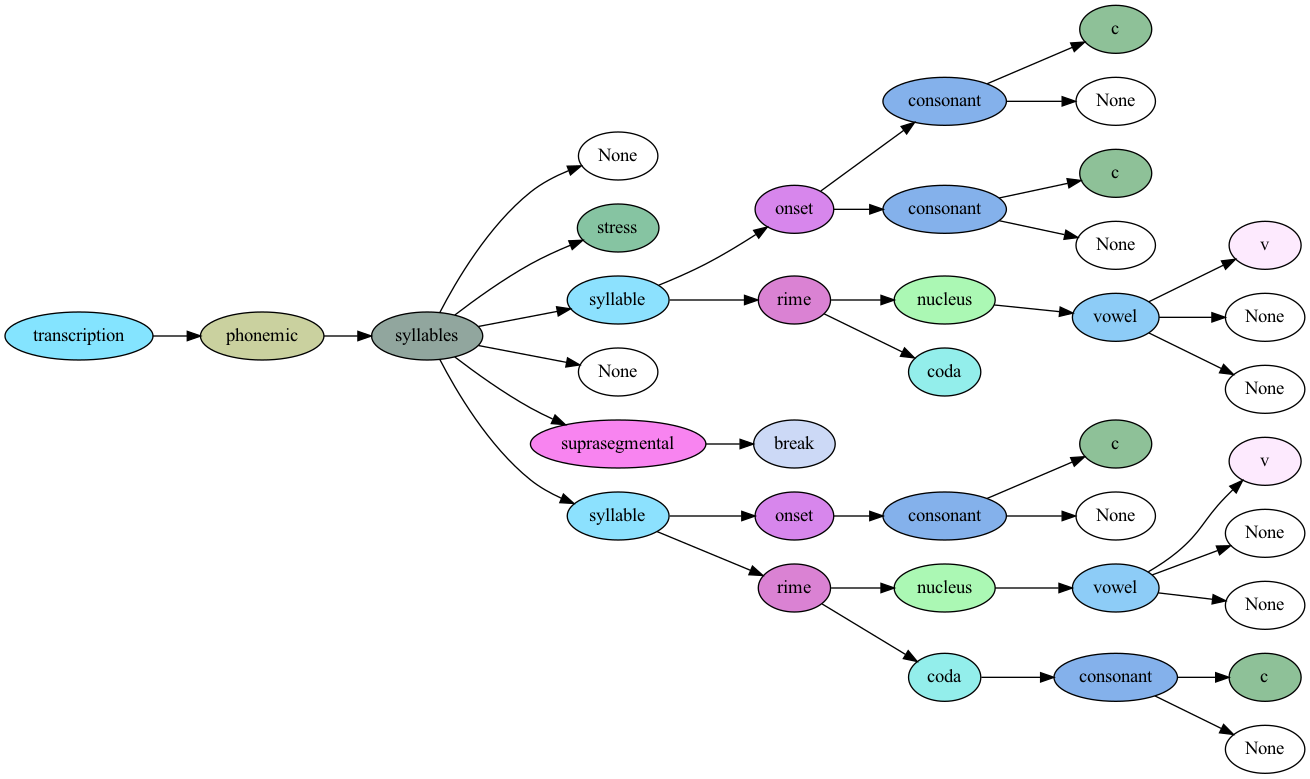

In [7]:
from IPython.display import Image
Image(filename='parse.png') 

In [8]:
pretty_parse('[kʰæt]', parser)

transcription
  phonetic
    syllables
      None
      None
      syllable
        onset
          consonant
            c
            cfeatures
              cfeature
                nonsyllabic
        rime
          nucleus
            vowel
              v
              None
              None
          coda
            consonant
              c
              None



In [9]:
tree.pydot__tree_to_dot(parser.parse('[kʰæt]'), 'cat.gv')

In [10]:
!dot -Tpng -o cat.png cat.gv

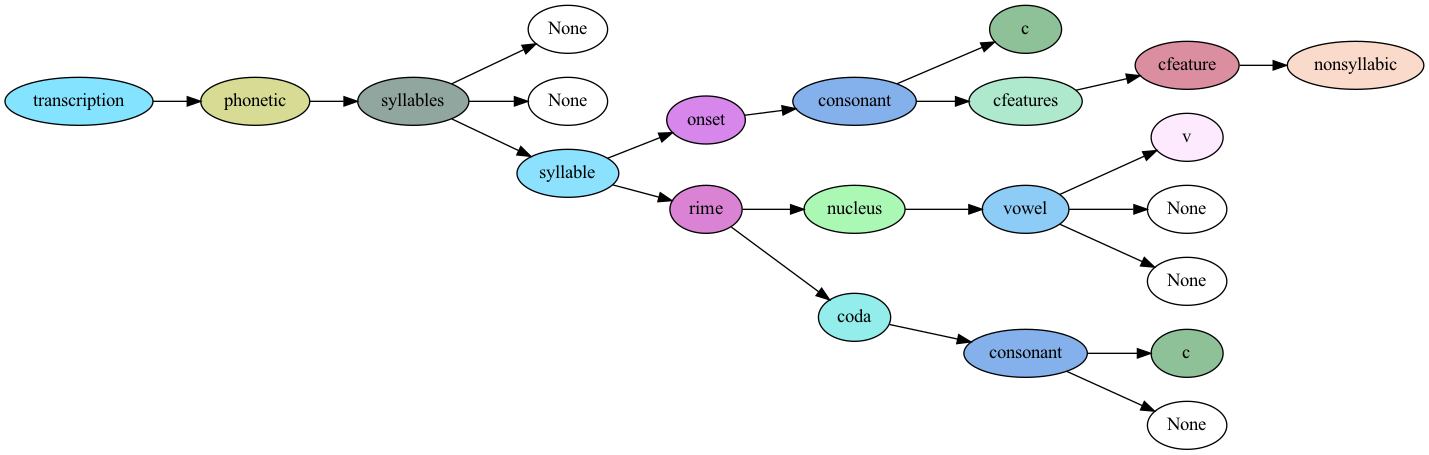

In [11]:
Image(filename='cat.png')

In [12]:
!./tests/run.zsh

/mǎi mài mâi mái/ PASS
/ˈkatən/ PASS
[ˈkhætn̩] PASS
[ˈdʒæk|pɹəˌpɛəɹɪŋ ðə ˈweɪ|wɛnt ˈɒn‖] PASS
[↑bɪn.ðɛɹ↘|↑dɐn.ðæt↘‖] PASS
[túrán↑tʃí nè] PASS
[xɤn˧˥ xaʊ˨˩˦] PASS
[ˈɹɪðm̩] PASS
[ˈhuːˀsð̩ɣ] PASS
[ˈsr̩t͡sɛ] PASS
[ɹ̝̍] PASS
[ʙ̞̍] PASS
èlʊ́kʊ́nyá PASS
huʔ˩˥ PASS
mā PASS
nu.jam.ɬ̩ PASS
a˩˥˥˩˦˥˩˨˧˦˧ PASS
[u ↑ˈvẽ.tu ˈnɔ.ɾtɯ ku.mɯˈso.ɐ.suˈpɾaɾ.kõˈmũi.tɐ ˩˧fu.ɾiɐ | mɐʃ ↑ˈku̯ɐ̃.tu.maiʃ.su˩˧pɾa.vɐ | maiz ↑u.viɐ↓ˈʒɐ̃.tɯ.si.ɐk.õʃ↓ˈɡa.va.suɐ ˧˩ka.pɐ | ɐˈtɛ ↑kiu ˈvẽ.tu ˈnɔɾ.tɯ ˧˩d̥z̥ʃtiu ǁ] PASS
( while read l; do; echo -n "$l " | tee /dev/stderr | ( ./ipa_grammar.py - > )  5.65s user 0.17s system 99% cpu 5.846 total
